In [2]:
import json
import pandas as pd
from pathlib import Path

In [65]:
p = Path("/Users/flo/projects/mastodon-stats/cache/peers/")

def row(filepath):
    with filepath.open() as fp:
        info = json.load(fp)
#     print(json.dumps(info, indent=4))
    
#     return pd.json_normalize(info)
    langs = info.get("languages", [])
    info["lang_0"] = langs[0] if langs else "unknown"
    keys = ["uri", "title", "short_description", "description", "stats", "email", "languages", "lang_0"]
    return {k: info.get(k) for k in keys}

rows = [row(f) for f in p.glob("*.json")]
df = pd.json_normalize(rows)    
df

,uri,title,short_description,description,email,languages,lang_0,stats.user_count,stats.status_count,stats.domain_count
0,mastodon.lertsenem.com,Lertsenem's Mastodon,,<p>\r\n<em>This is a private instance. Sorry.<...,,[en],en,2,10597,12451
1,merlion.social,Merlion.Social,Merlion Social is a Singapore-based Mastodon i...,Merlion Social is a Singapore-based Mastodon i...,merlion.social@gmail.com,[en],en,14,82,4109
2,https://some.eipystyilman.beer,Pleroma,None,Pleroma: An efficient and flexible fediverse s...,example@example.com,[en],en,2,69,1227
3,tinycart.club,Tiny Cart Club,Best place on the 'net for tiny carts.,,admin@tinycart.club,[en],en,1,11,1311
4,mstdn.delmulin.com,デルムリン丼,「ドラゴンクエスト ダイの大冒険」のファンの為のインスタンスです。,デルムリン丼は、「ドラゴンクエスト ダイの大冒険」のファンの為の非公式Mastodonインス...,support@delmulin.com,[en],en,13,20112,4450
...,...,...,...,...,...,...,...,...,...,...
73,techthoughts.io,TechThoughts.io,,,tim@tsmith.co,[en],en,1,43,2641
74,toast.farm,toast.farm,"toast.farm is a semi-personal <a href=""https:/...","Toast.farm is a semi-personal <a href=""https:/...",emergency@toast.farm,[en],en,1,22,1327
75,numinauts.club,Numinauts,"A home for animists, artists, and explorers of...",,reverendjanglebones@gmail.com,[en],en,12,242,1512
76,thefrakinship.xyz,Mastodon @ thefrakinship,All of this has happened before. All of this w...,The scrolls tell us a 13th tribe left Kobol in...,mastodon@mcmaster.io,[en],en,1,23,1771


In [13]:
print(df.columns)

Index(['uri', 'title', 'short_description', 'description', 'email', 'version',
       'thumbnail', 'max_toot_chars', 'languages', 'registrations',
       ...
       'pleroma.metadata.federation.mrf_simple_info.reject.birds.garden.reason',
       'pleroma.metadata.federation.mrf_simple_info.reject.youjo.love.reason',
       'pleroma.metadata.federation.mrf_simple_info.reject.strelizia.net.reason',
       'pleroma.metadata.federation.mrf_simple_info.reject.pieville.net.reason',
       'account_domain', 'thumbnail_type', 'thumbnail_description',
       'configuration.accounts.allow_custom_css',
       'configuration.emojis.emoji_size_limit', 'contact_account.enable_rss'],
      dtype='object', length=192)


## Turn instance text into features

In [29]:
!pip install scikit-learn

  Using cached https://files.pythonhosted.org/packages/f8/74/273c03e5a3b9aa0881812dd36c3f5a25f92177c96219d1d110ed96673a34/scikit_learn-1.0.2-cp37-cp37m-macosx_10_13_x86_64.whl
    100% |████████████████████████████████| 307kB 17.1MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/61/cf/6e354304bcb9c6413c4e02a747b600061c21d38ba51e7e544ac7bc66aecc/threadpoolctl-3.1.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/85/64/5dbe0daf0beb14c3cd4b9a3493c5dc1fda68d13ad3fe0b173be8032e3172/scipy-1.7.3-cp37-cp37m-macosx_10_9_x86_64.whl
You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.description)
vectorizer.get_feature_names_out()
# array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
#        'this'], ...)

array(['03', '1100', '13', '13th', '14', '18', '2021', '24', '500', '501',
       '72406', '8sp', '_______', '_blank', 'aanw', 'aboard', 'about',
       'above', 'absolutely', 'accelerating', 'accessible', 'account',
       'accounts', 'acquaintances', 'action', 'actions', 'active',
       'added', 'adjective', 'admin', 'administrative', 'administrator',
       'administrators', 'adresse', 'advance', 'advertisements',
       'advocacy', 'advocating', 'affiliation', 'afin', 'against', 'age',
       'agnosticism', 'all', 'allaboardnw', 'alles', 'als', 'alt',
       'amodernist', 'an', 'and', 'anfrage', 'another', 'anwalt', 'any',
       'anzeige', 'appearance', 'appearing', 'are', 'around', 'art', 'as',
       'ashka', 'asteroid', 'at', 'atelier', 'atheism', 'atmosphere',
       'attention', 'attribution', 'auditable', 'auf', 'auml', 'auto',
       'automated', 'avec', 'b612', 'b612是小王子的小星球', 'based', 'be',
       'because', 'before', 'behavior', 'behaviour', 'behaviours',
       'beide'

In [33]:
import numpy as np
from sklearn.manifold import TSNE
# X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X)

In [34]:
X_embedded.shape

(78, 2)

In [38]:
pd.DataFrame(X_embedded, columns=["x", "y"])

,x,y
0,4.238249,5.143795
1,8.873440,1.703347
2,10.579692,-21.177132
3,-5.274107,1.269521
4,-10.920669,-1.122456
...,...,...
73,-6.747951,2.168197
74,3.031027,5.326749
75,-6.319170,3.268834
76,21.594994,-4.023210


['en' 'de' 'fr' 'unknown']


/Users/flo/projects/mastodon-stats/venv/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  func(*args, **kwargs)
/Users/flo/projects/mastodon-stats/venv/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from current font.
  func(*args, **kwargs)
/Users/flo/projects/mastodon-stats/venv/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  func(*args, **kwargs)
/Users/flo/projects/mastodon-stats/venv/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from current font.
  func(*args, **kwargs)
/Users/flo/projects/mastodon-stats/venv/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  func(*args, **kwargs)
/Users/flo/projects/m

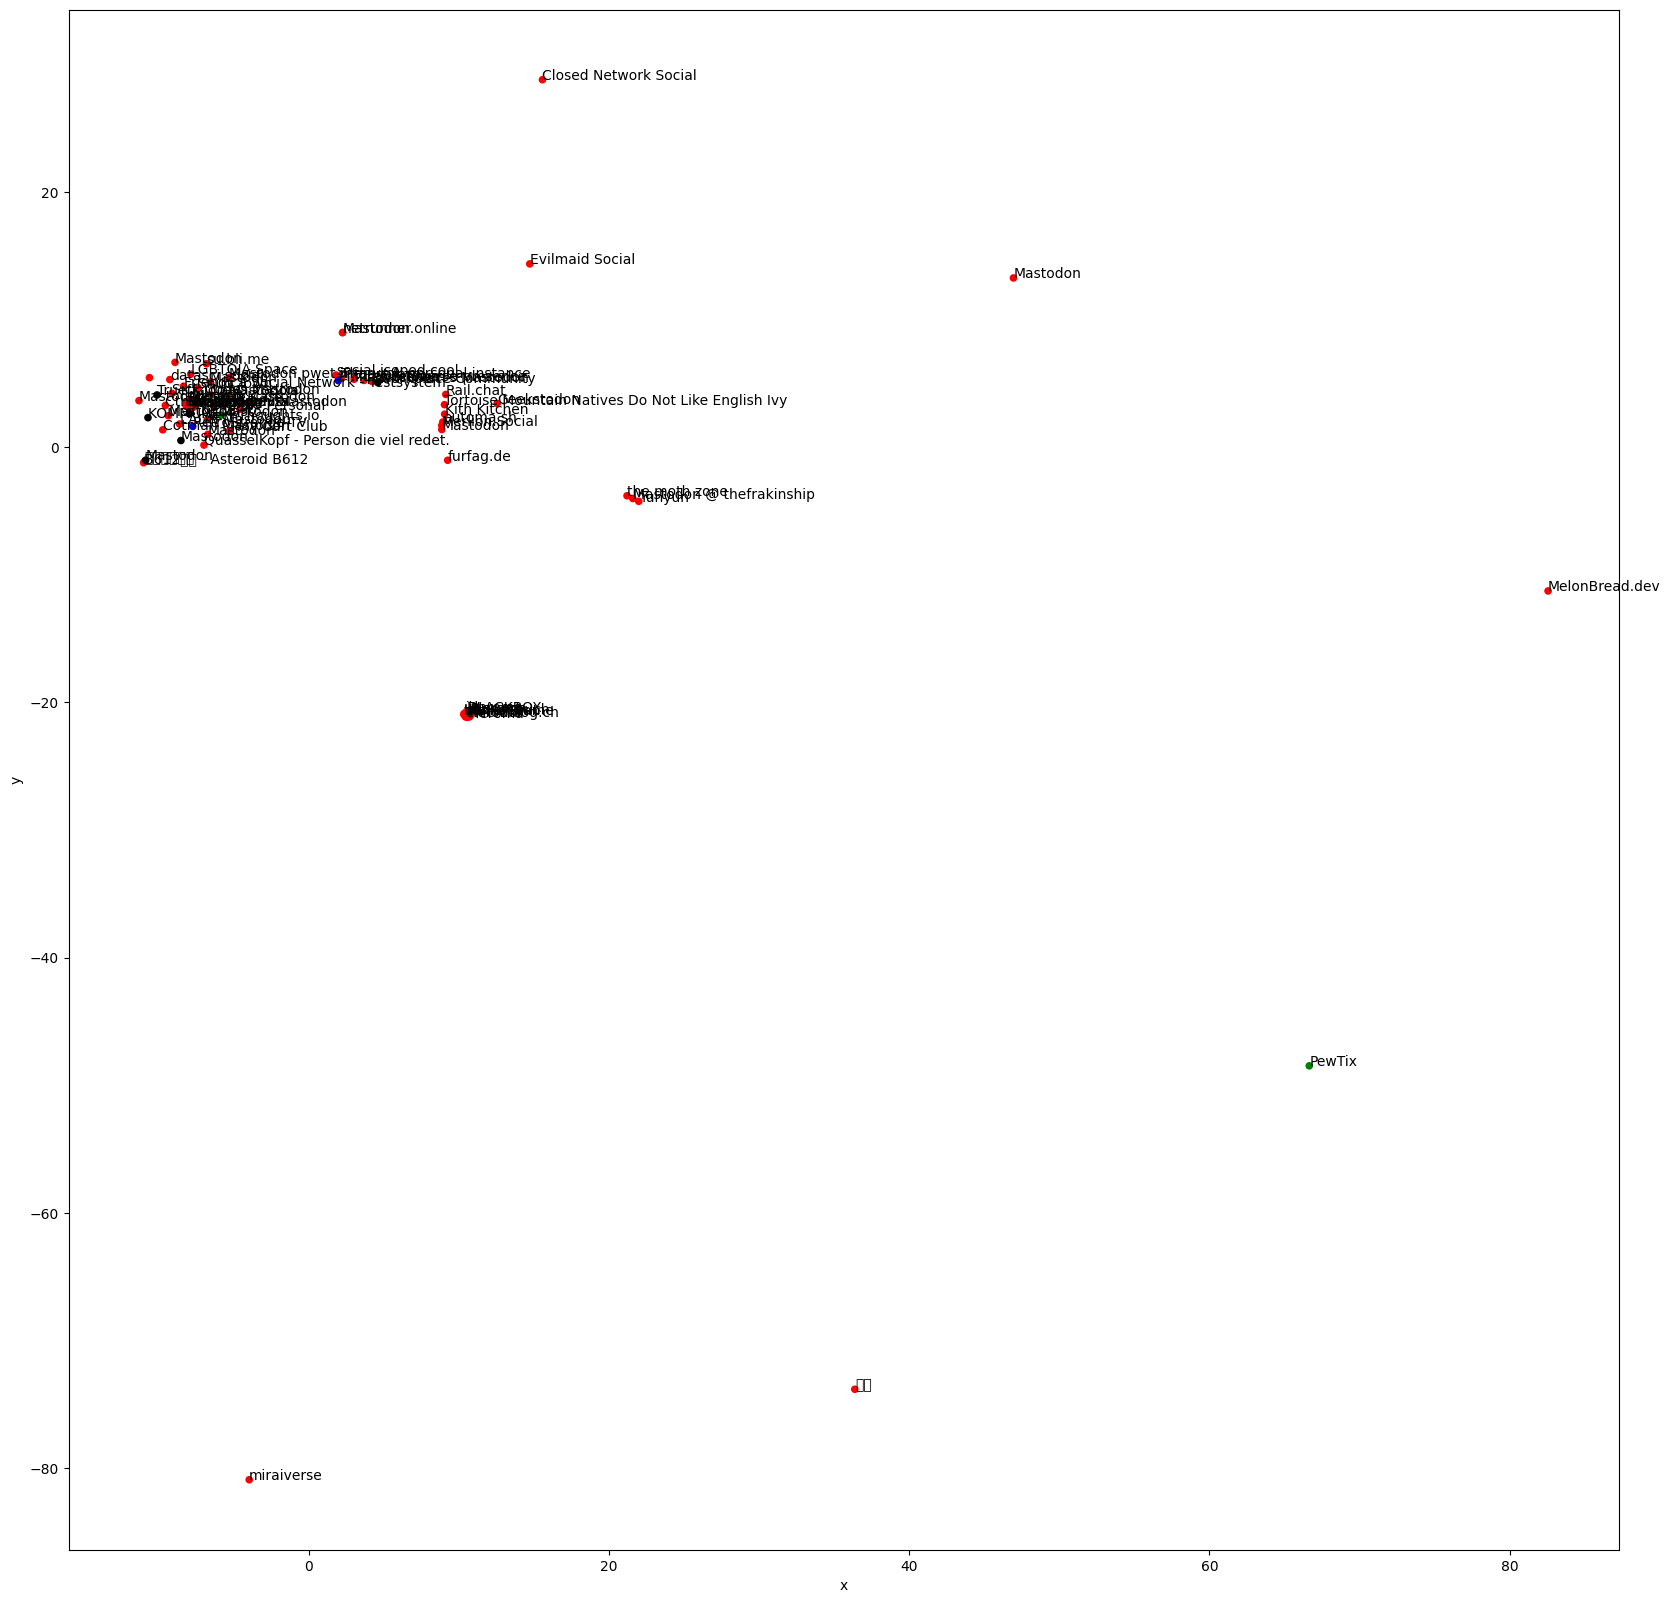

In [72]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
# df.plot('x', 'y', kind='scatter', ax=ax)



print(df_plot.lang_0.unique())
colors = {'en':'red', "de": "black", 'fr':'green', 'unknown':'blue'}

df_plot = pd.concat([df, pd.DataFrame(X_embedded, columns=["x", "y"])], axis=1)
df_plot.plot.scatter(x="x", y="y", ax=ax, figsize=(20, 20), c=df_plot.lang_0.map(colors))



for k, v in df_plot.iterrows():
#     print(k, v.uri, v.x)
    
    ax.annotate(v.title, (v.x, v.y))

In [73]:
for k, row in df_plot.iterrows():
    print(row.uri, row.description[:100])

mastodon.lertsenem.com <p>
<em>This is a private instance. Sorry.</em>
</p>
<p>
Go check <a href='https://instances.mas
merlion.social Merlion Social is a Singapore-based Mastodon instance, catering for the netizens of Singapore. We en
https://some.eipystyilman.beer Pleroma: An efficient and flexible fediverse server
tinycart.club 
mstdn.delmulin.com デルムリン丼は、「ドラゴンクエスト ダイの大冒険」のファンの為の非公式Mastodonインスタンスです。<br>
同作品のファンであればどなたでも参加することが出来ますので、お気軽にご利用ください。
burg.art 
sick.social 
https://melonbread.dev A place where I kinda just speak into the void
https://microblog.ch Pleroma: An efficient and flexible fediverse server
kith.kitchen <em>kith:</em> [noun] one's friends and acquaintances

Kith Kitchen is a Mastodon instance centred
closednetwork.social A community of privacy & security passionate individuals.
lgbtqia.space 
holzminden.social 
mastodon.cthos.dev 
furfag.de Welcome to furfag.de! I'm still building this, but you can be as gay as you want, as long as its leg
rail.chat Rail chat at ra